In [85]:
# prompt: read  /content/healthcare_dataset.csv on pandas files
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')
df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [86]:
# prompt: explain about above dataset

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [87]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [88]:
# prompt: showme dataset columns

df.columns


Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [89]:
df['gender'].value_counts()


Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [90]:
# prompt: print  all records with only 'other' gender

df[df['gender'] == 'Other']


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
12669,Other,10.0,0,0,not current,14.09,5.0,140,0
14838,Other,19.0,0,0,No Info,27.32,5.7,158,0
16702,Other,39.0,0,0,not current,31.24,6.2,85,0
18691,Other,10.0,0,0,not current,16.59,6.1,160,0
23266,Other,23.0,0,0,No Info,24.23,6.1,140,0
31985,Other,53.0,0,0,No Info,27.32,6.6,160,0
33805,Other,45.0,0,0,never,27.32,4.0,159,0
34929,Other,47.0,0,0,never,36.76,6.6,90,0
35006,Other,47.0,0,0,never,36.76,3.5,200,0
40337,Other,18.0,0,0,not current,30.19,6.1,90,0


In [91]:
# prompt: delete all gender = other from dataset

df = df[df['gender'] != 'Other']


In [92]:
# prompt: reindex dataframe

df.reset_index(drop=True, inplace=True)


In [93]:
# prompt: convert gender category

df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})

<ipython-input-93-9c5448994166>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})


In [94]:
df['gender'].value_counts()

0    58552
1    41430
Name: gender, dtype: int64

In [95]:
df['smoking_history'].value_counts()

No Info        35810
never          35092
former          9352
current         9286
not current     6439
ever            4003
Name: smoking_history, dtype: int64

In [96]:
# prompt: convert  smoking_history category


# Create a mapping dictionary from categories to numbers
mapping = {
    'No Info': 0,
    'never': 0,
    'former': 1,
    'current': 2,
    'not current': 1,
    'ever': 1
}

# Apply the mapping to the 'Smoking_Status' column
df['smoking_history'] = df['smoking_history'].map(mapping)

# Show the resulting DataFrame
df


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99977,0,80.0,0,0,0,27.32,6.2,90,0
99978,0,2.0,0,0,0,17.37,6.5,100,0
99979,1,66.0,0,0,1,27.83,5.7,155,0
99980,0,24.0,0,0,0,35.42,4.0,100,0


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99982 entries, 0 to 99981
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               99982 non-null  int64  
 1   age                  99982 non-null  float64
 2   hypertension         99982 non-null  int64  
 3   heart_disease        99982 non-null  int64  
 4   smoking_history      99982 non-null  int64  
 5   bmi                  99982 non-null  float64
 6   HbA1c_level          99982 non-null  float64
 7   blood_glucose_level  99982 non-null  int64  
 8   diabetes             99982 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 6.9 MB


In [98]:
## Independent And dependent features
X=df.drop('diabetes',axis=1)
y=df['diabetes']

In [99]:
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,0,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,0,27.32,5.7,158
3,0,36.0,0,0,2,23.45,5.0,155
4,1,76.0,1,1,2,20.14,4.8,155


In [100]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [101]:
X_train.shape,X_test.shape

((74986, 8), (24996, 8))

In [102]:
X_train.corr()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
gender,1.000000,-0.031549,0.015058,0.076485,0.045562,-0.024287,0.020936,0.016910
age,-0.031549,1.000000,0.250707,0.233200,0.170090,0.338458,0.100673,0.107679
hypertension,0.015058,0.250707,1.000000,0.120909,0.060298,0.147456,0.081422,0.081772
heart_disease,0.076485,0.233200,0.120909,1.000000,0.063792,0.059865,0.068207,0.066468
smoking_history,0.045562,0.170090,0.060298,0.063792,1.000000,0.126098,0.028410,0.033590
bmi,-0.024287,0.338458,0.147456,0.059865,0.126098,1.000000,0.085102,0.090641
HbA1c_level,0.020936,0.100673,0.081422,0.068207,0.028410,0.085102,1.000000,0.165052
blood_glucose_level,0.016910,0.107679,0.081772,0.066468,0.033590,0.090641,0.165052,1.000000


<Axes: >

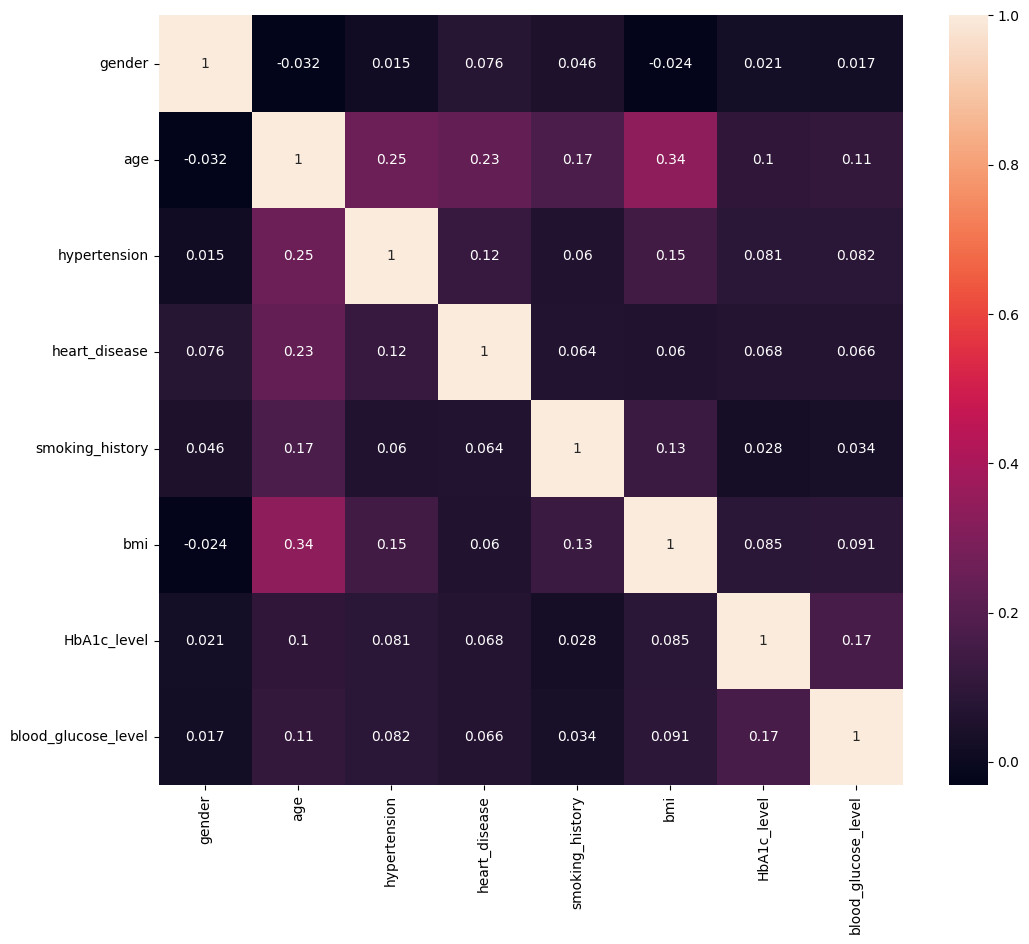

In [103]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [104]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [106]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.85)

In [107]:
corr_features

set()

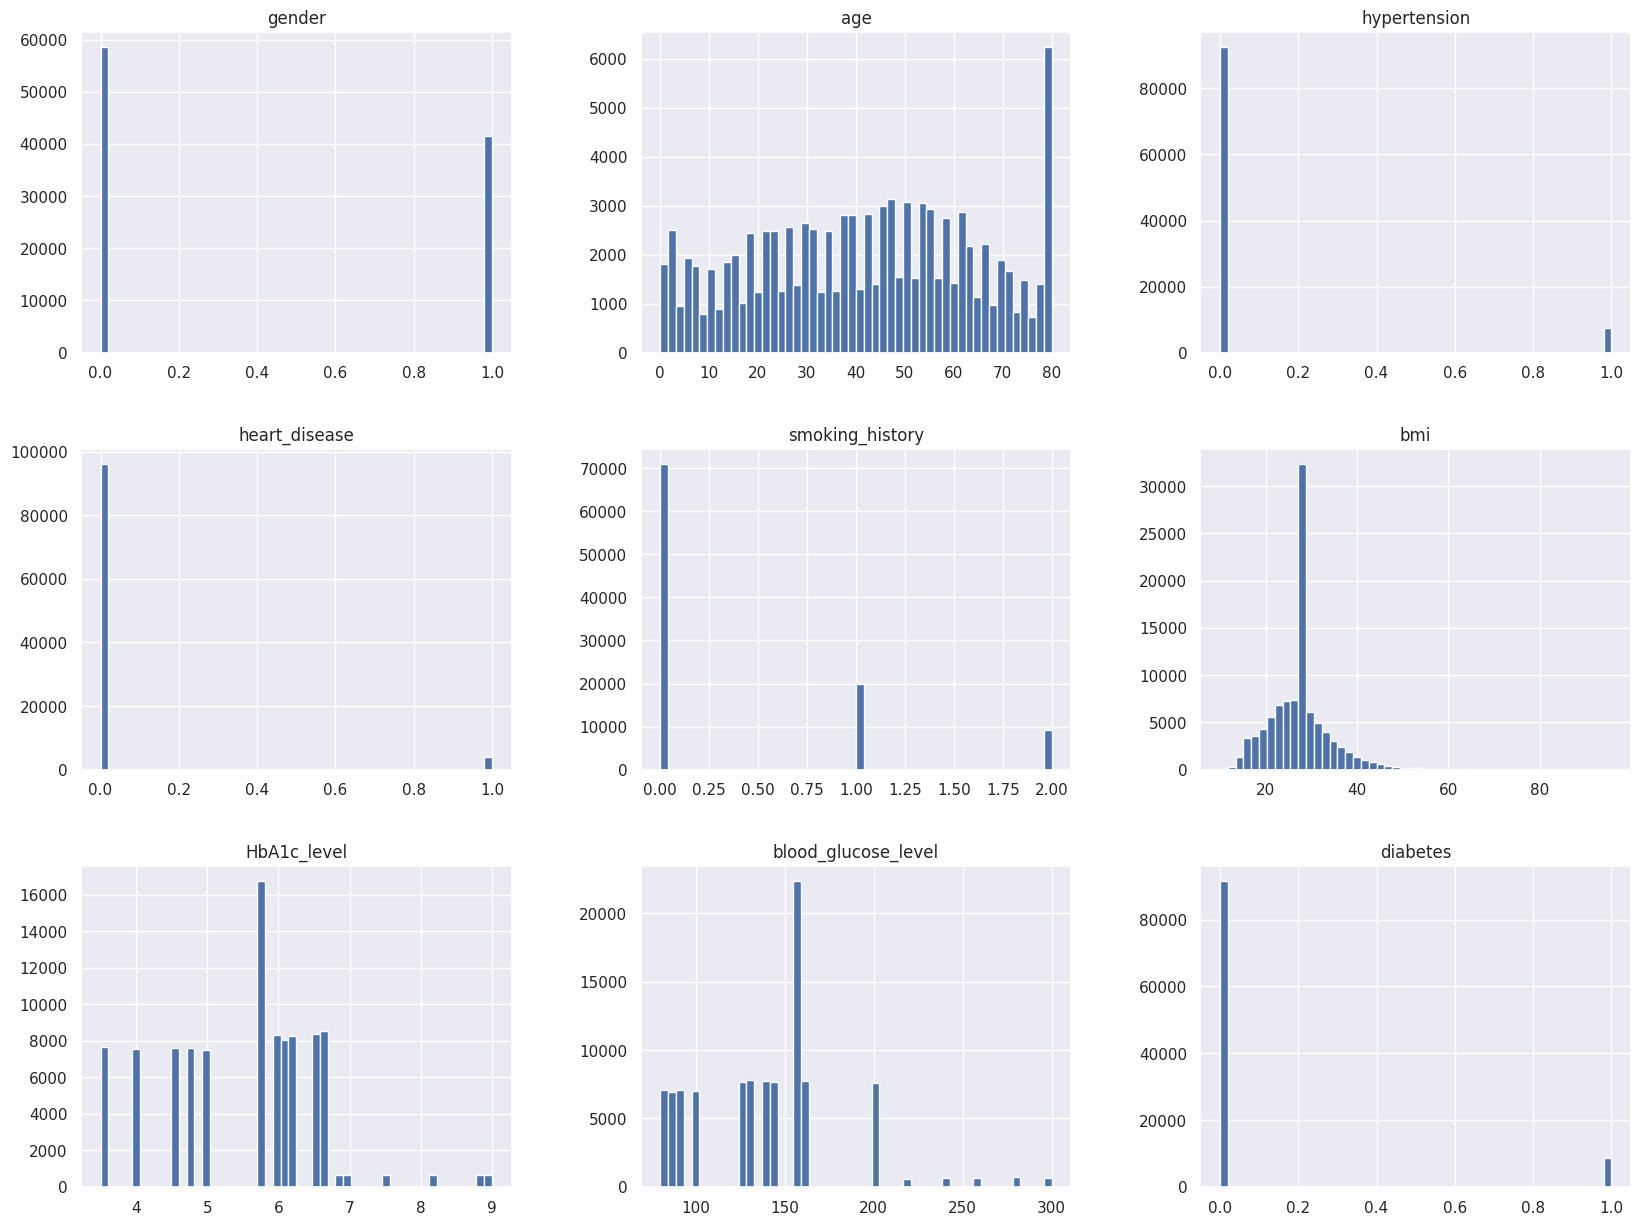

In [109]:
sns.set() #We are using seaborn to make the plots look better. This adds some styling to our plots. You can try removing this and see how the plot looks.
df.hist(bins=50,figsize=(20,15))
plt.show()

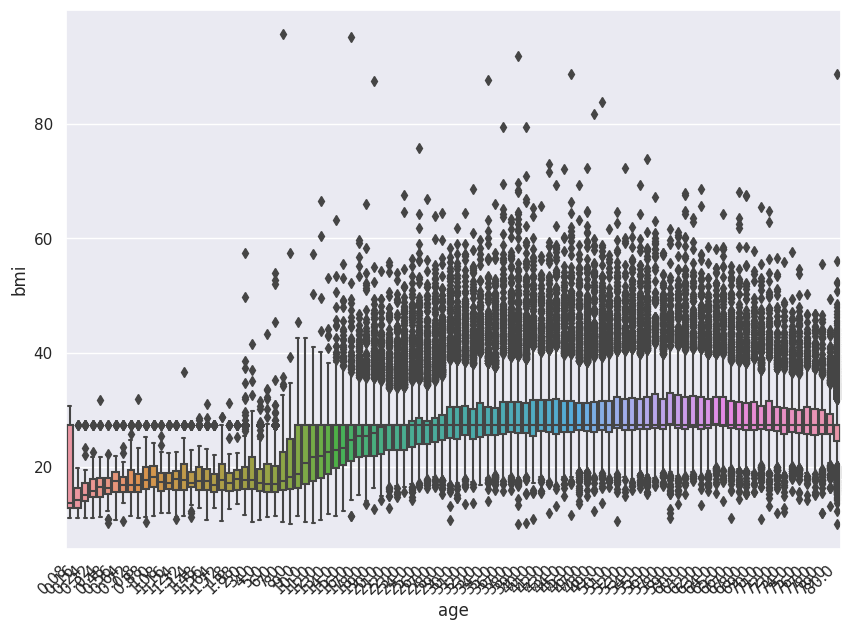

In [111]:
plt.subplots(figsize=(10,7))
ax=sns.boxplot(x='age', y='bmi', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')
plt.show()

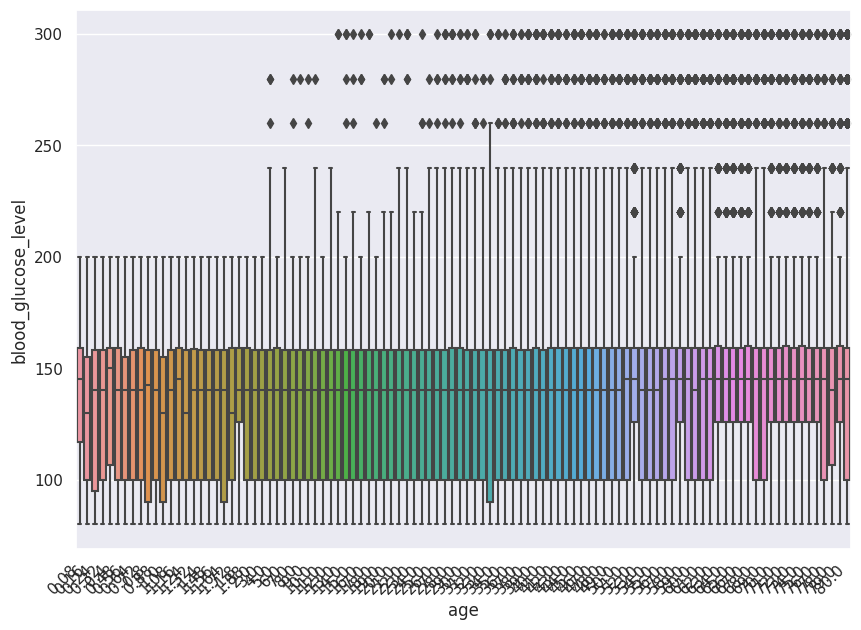

In [114]:
plt.subplots(figsize=(10,7))
ax=sns.boxplot(x='age', y='blood_glucose_level', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')
plt.show()

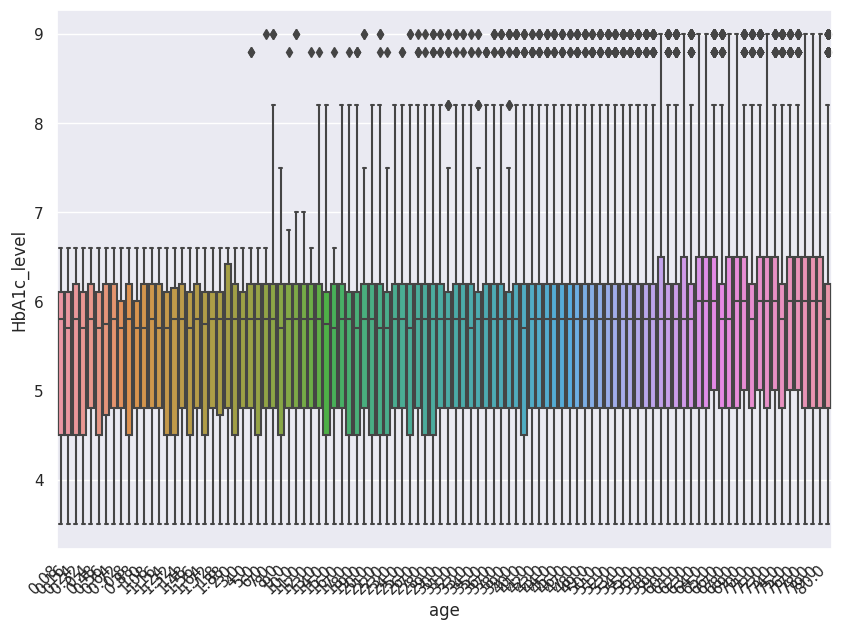

In [113]:
plt.subplots(figsize=(10,7))
ax=sns.boxplot(x='age', y='HbA1c_level', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')
plt.show()

In [116]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [124]:
X_test_sc=pd.DataFrame(X_test_sc, columns=X_train.columns)
X_test_sc

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,-0.840614,1.561844,3.515924,-0.201041,-0.591284,-0.187023,-1.894211,0.490301
1,-0.840614,0.140310,-0.284420,-0.201041,-0.591284,2.039643,-0.679632,-1.179644
2,-0.840614,-1.147955,-0.284420,-0.201041,2.482729,-0.995488,0.908664,-1.302434
3,-0.840614,-1.592184,-0.284420,-0.201041,-0.591284,-0.710944,0.254659,-1.425224
4,1.189606,0.984346,-0.284420,4.974118,-0.591284,0.001168,-0.679632,0.171046
...,...,...,...,...,...,...,...,...
24991,1.189606,1.472998,-0.284420,-0.201041,0.945722,0.001168,0.628376,0.539417
24992,-0.840614,-0.348342,-0.284420,-0.201041,-0.591284,-1.147545,-0.679632,0.171046
24993,1.189606,0.762231,-0.284420,-0.201041,-0.591284,1.729506,1.002093,-0.934064
24994,-0.840614,-0.526034,-0.284420,-0.201041,0.945722,-0.671800,-0.959920,-0.934064


In [125]:
# prompt: Data is imbalance use smote technique to oversample 0 in loan_status column

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train_sc, y_train)

In [126]:
X_train_sm.shape, y_train_sm.shape

((137354, 8), (137354,))

In [127]:
y_train_sm.value_counts()

0    68677
1    68677
Name: diabetes, dtype: int64

In [128]:
# prompt: convert X_train_sm into dataframe and name columns from x_train columns

X_train_sm=pd.DataFrame(X_train_sm, columns=X_train.columns)

<ipython-input-129-cc161a5a92aa>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

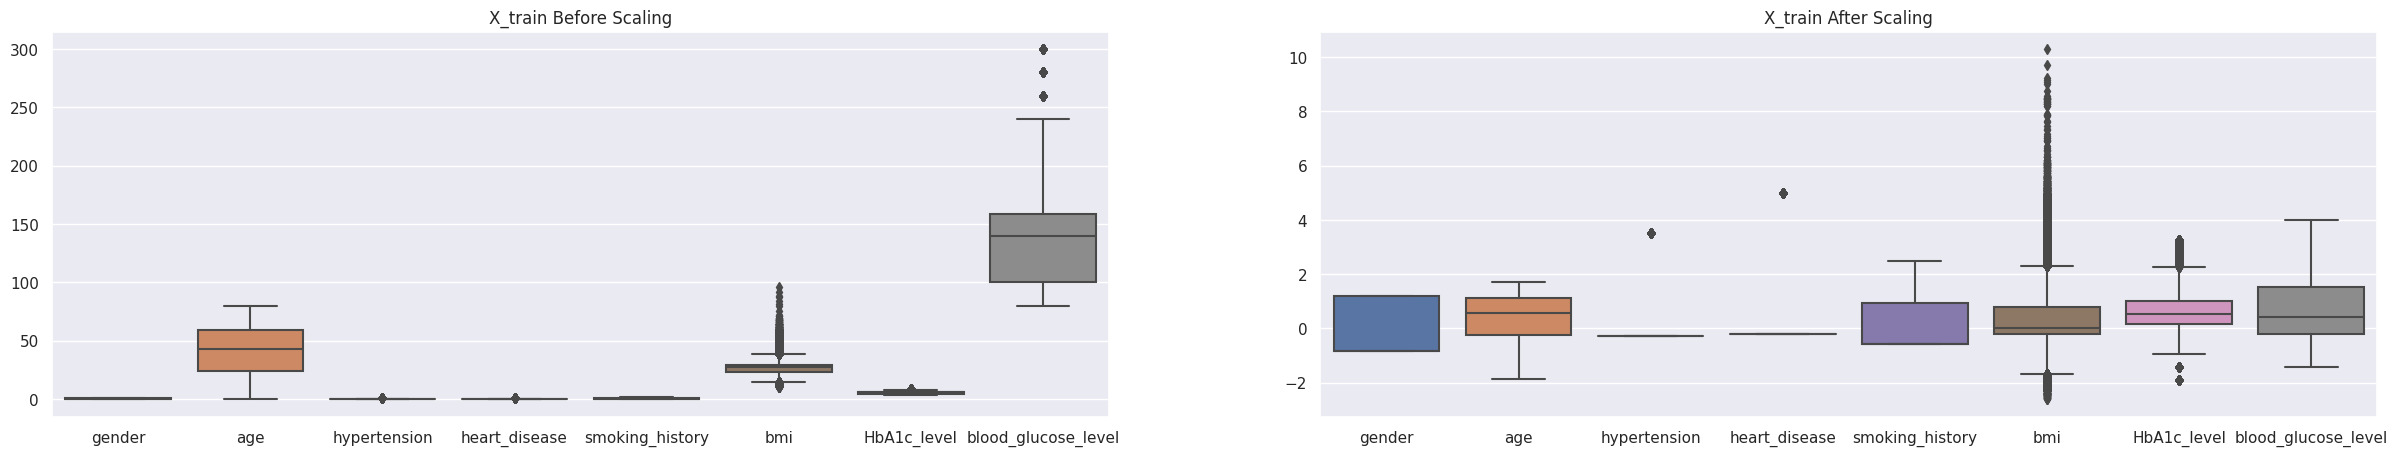

In [129]:
plt.subplots(figsize=(30, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_sm)
plt.title('X_train After Scaling')

In [130]:
# prompt: check multicollinearity inside x_train_sm data

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = pd.DataFrame()
vif_df['Features'] = X_train_sm.columns
vif_df['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif_df

,Features,VIF
0,gender,1.020222
1,age,1.511322
2,hypertension,1.135257
3,heart_disease,1.121036
4,smoking_history,1.044039
5,bmi,1.210076
6,HbA1c_level,1.404453
7,blood_glucose_level,1.350358


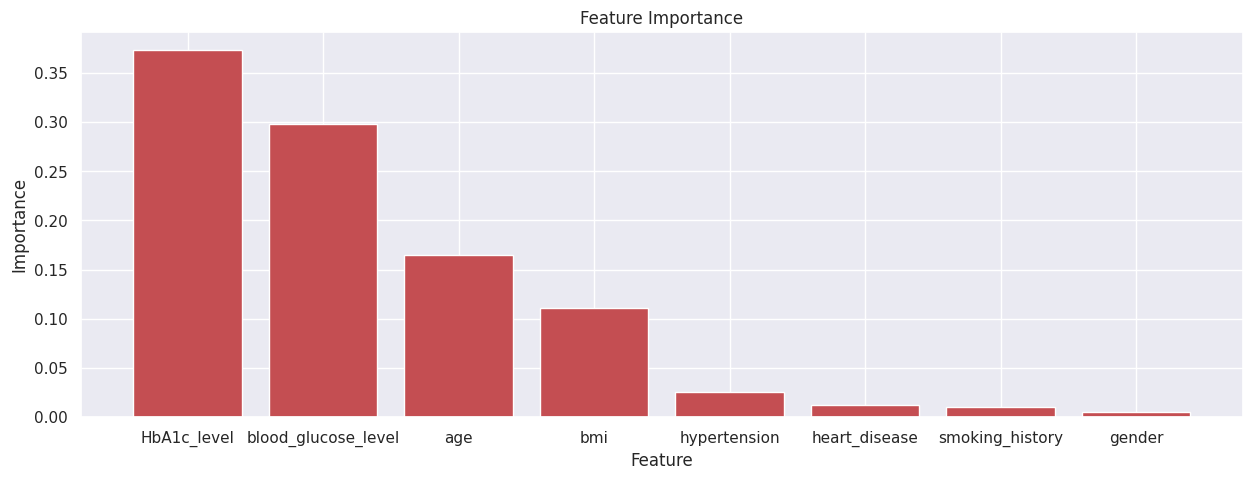

In [132]:
# prompt: show me the top 8 features which are important to predict loan_status in random forest
rf=RandomForestClassifier()
rf.fit(X_train_sm, y_train_sm)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15, 5))
plt.title("Feature Importance")
plt.bar(range(8), importances[indices[:8]], color="r", align="center")
plt.xticks(range(8), X_train_sm.columns[indices[:8]])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

In [134]:
X_train_sm.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level'],
      dtype='object')

In [135]:
# prompt: drop features like gender,  Education, Self_Employed from x_train_sm

X_train_sm.drop(['hypertension', 'heart_disease', 'smoking_history','gender'], axis=1, inplace=True)
X_train_sm.shape

(137354, 4)

In [136]:
X_test_sc.drop(['hypertension', 'heart_disease', 'smoking_history','gender'], axis=1, inplace=True)
X_test_sc.shape

(24996, 4)

In [142]:
# prompt: use multiple models like random forest regressor, decision tree, naive bayes regressor, logistic regression, support vector classifier to learn x_train_sm and y_train_sm to check the

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

models = [SVC(), GaussianNB(), LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=100)]
for model in models:
  model.fit(X_train_sm, y_train_sm)
  y_pred = model.predict(X_test_sc)
  print(f"Model: {model.__class__.__name__}")
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("Precision:", precision_score(y_test, y_pred))
  print("Recall:", recall_score(y_test, y_pred))
  print("F1 score:", f1_score(y_test, y_pred))
  print()

Model: SVC
Accuracy: 0.8734197471595455
Precision: 0.4039865798302743
Recall: 0.9342765860337745
F1 score: 0.5640672361532103

Model: GaussianNB
Accuracy: 0.8880220835333653
Precision: 0.4294990723562152
Recall: 0.8452761296211776
F1 score: 0.5695832692603414

Model: LogisticRegression
Accuracy: 0.8797407585213635
Precision: 0.4127222103234097
Recall: 0.8795070743952533
F1 score: 0.561807580174927

Model: DecisionTreeClassifier
Accuracy: 0.9484317490798527
Precision: 0.6930650684931506
Recall: 0.7389319945230488
F1 score: 0.7152639717252043

Model: RandomForestClassifier
Accuracy: 0.958993438950232
Precision: 0.7906281156530409
Recall: 0.7238703788224555
F1 score: 0.7557779366213963



In [143]:
model

RandomForestClassifier()

In [144]:
import pickle
pickle.dump(scaler, open('Diabetes_RandomForestClassifier.pkl', 'wb'))